# Mapping results Nath & Thingbaijam (2012)


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from glob import glob

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.colors import LogNorm, BoundaryNorm
from matplotlib.ticker import MultipleLocator

import numpy as np
import pandas as pd

from openquake.hazardlib import imt

from toolbox import logspace, stdval, annotate, read_hazard_map_csv, convert_probability

In [3]:
NATH_PATH = '../Data/nath2012probabilistic'
# MAP_CSV = 'map_collapsed_v1/hazard_map-mean_360.csv'
MAP_CSV = 'map_collapsed_v2/hazard_map-mean_24323.csv'
PUBLISHED_CSV = 'map_published.csv'

T_NOM = 50  # years
T_INV = 1  # years 
POES_NOM = [0.02, 0.1]

In [4]:
map_imts = ['PGA','SA(0.2)','SA(1.0)']
map_tables = ['India_pga.csv','India_psa_pt2sec.csv','India_psa_1sec.csv']
model_path = '../Data/nath2012probabilistic'
map_table_list = [os.path.join(model_path, item) for item in map_tables]
map_table_df_list = [pd.read_csv(file_name) for file_name in map_table_list]

In [5]:
df_map = map_table_df_list[0][['lon', 'lat']]
map_coords_csv = 'NT2012_Figure_7_Indian_subcontinent_lon_lat.csv'
print('sites_csv = %s' % map_coords_csv)
df_map.to_csv(map_coords_csv, header=False, index=False, float_format='%g')

sites_csv = NT2012_Figure_7_Indian_subcontinent_lon_lat.csv


In [6]:
imts = [imt.from_string(item) for item in ['PGA', 'SA(0.2)', 'SA(1.0)']]
im_levels = logspace(0.004, 5, 6)

print('intensity_measure_types_and_levels = {%s}' 
      % ', '.join(['"%s": [%s]' % (str(im_type), ', '.join(['%g' % iml for iml in im_levels])) 
                   for im_type in imts]))

intensity_measure_types_and_levels = {"PGA": [0.0047, 0.0068, 0.01, 0.015, 0.022, 0.033, 0.047, 0.068, 0.1, 0.15, 0.22, 0.33, 0.47, 0.68, 1, 1.5, 2.2, 3.3, 4.7], "SA(0.2)": [0.0047, 0.0068, 0.01, 0.015, 0.022, 0.033, 0.047, 0.068, 0.1, 0.15, 0.22, 0.33, 0.47, 0.68, 1, 1.5, 2.2, 3.3, 4.7], "SA(1.0)": [0.0047, 0.0068, 0.01, 0.015, 0.022, 0.033, 0.047, 0.068, 0.1, 0.15, 0.22, 0.33, 0.47, 0.68, 1, 1.5, 2.2, 3.3, 4.7]}


In [7]:
sites_table = os.path.join(NATH_PATH, 'Table 3.csv')
df_cities = pd.read_csv(sites_table, skiprows=1, index_col='City')
df_cities

,Latitude (°N),Longitude (°E),BIS,zone,GSHAP,Present,Other,Reference
City,,,,,,,,
Ahmedabad,23.030000,72.610000,0.08,III,0.05,0.11,0.1,Jaiswal and Sinha 2007†
Bangalore,12.980000,77.580000,0.05,II,0.05,0.11,0.10; 0.15,Jaiswal and Sinha 2007†; Anbazhagan et al. 2009
Bhuj,23.250000,69.660000,0.18,V,0.20,0.42,0.25; 0.20-0.70,Jaiswal and Sinha 2007†; Petersen et al. 2004‡
Chennai,13.000000,80.180000,0.08,III,0.05,0.12,0.089; 0.10,Menon et al. 2010; Jaiswal and Sinha 2007†
Dehradun,30.330000,78.040000,0.12,IV,0.30,0.47,0.45,Mahajan et al. 2010
Guwahati,26.180000,91.730000,0.18,V,0.30,0.66,0.5,Sharma and Malik 2006
Hyderabad,17.450000,78.460000,0.05,II,0.05,0.09,0.08,Jaiswal and Sinha 2007†
Imphal,24.780000,93.940000,0.18,V,0.45,0.68,0.5,Sharma and Malik 2006
Jabalpur,23.200000,79.950000,0.08,III,0.10,0.19,0.15,Jaiswal and Sinha 2007†


## Published Results

In [8]:
published_file_name = 'map_published.png'
map_files = ['India_pga.csv', 
             'India_psa_pt2sec.csv', 
             'India_psa_1sec.csv']
imt_rename = {'pga': 'PGA', 
              'psa_pt2sec': 'SA(0.2)', 
              'psa_1sec': 'SA(1.0)'}

dfs = []
for map_file in map_files:
    im_type = imt_rename[map_file.split('_', 1)[1].split('.')[0]]
    probs = ['prob%d' % round(100*poe_nom) for poe_nom in POES_NOM]
    keys = [ '%s-%.5g' % (im_type, convert_probability(poe_nom, T_NOM, T_INV)) for poe_nom in POES_NOM]
    rename = {prob: key for prob, key in zip(probs, keys)}
    print('%s renaming: %s' % (map_file, rename))
    df = pd.read_csv(os.path.join(NATH_PATH, map_file), index_col=['lon', 'lat'])[probs]
    df.rename(columns=rename, inplace=True)
    dfs.append(df)
df_pub = pd.concat(dfs, axis=1, sort=True)


grid_step = np.mean(np.diff(sorted(list(set(df_pub.index.get_level_values('lat'))))))
print('Grid step: %g°' % grid_step)

iml_limits = (df_pub[df_pub != 0].min().min(), df_pub.max().max())
iml_limits = (stdval(iml_limits[0], 6, bump=-0.5), stdval(iml_limits[1], 6, bump=0.5))
print('IML iml_limits: ' + ', '.join('%g g' % item for item in iml_limits))

iml_boundaries = logspace(iml_limits[0], iml_limits[1], 6)
iml_cmap = plt.cm.get_cmap('jet', len(iml_boundaries) + 1)
iml_norm = BoundaryNorm(iml_boundaries, ncolors=iml_cmap.N)
iml_labels = ['%g' % item for item in iml_boundaries]

print('Saving: ' + PUBLISHED_CSV)
with open(PUBLISHED_CSV, 'a', encoding='ascii') as file:
    file.write("# kind='mean', investigation_time=1.0\n")
    df_pub.to_csv(file, index=True)

India_pga.csv renaming: {'prob2': 'PGA-0.00040397', 'prob10': 'PGA-0.002105'}
India_psa_pt2sec.csv renaming: {'prob2': 'SA(0.2)-0.00040397', 'prob10': 'SA(0.2)-0.002105'}
India_psa_1sec.csv renaming: {'prob2': 'SA(1.0)-0.00040397', 'prob10': 'SA(1.0)-0.002105'}
Grid step: 0.2°
IML iml_limits: 0.0047 g, 4.7 g
Saving: map_published.csv


Saving: map_published.png


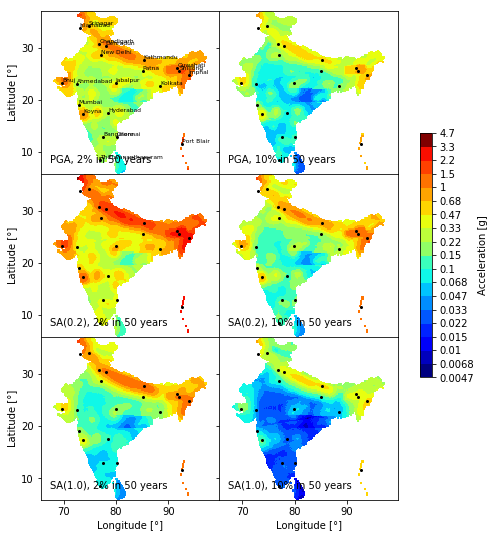

In [9]:
df_pub, config = read_hazard_map_csv(PUBLISHED_CSV)

imts = df_pub.columns.levels[0].values
poes_inv = df_pub.columns.levels[1].values

fig, axes = plt.subplots(len(imts), len(poes_inv), 
                         figsize=(4*len(poes_inv),3*len(imts)), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'datalim', 'aspect': 1})
fig.subplots_adjust(hspace=0, wspace=0)
for imt, row_axes in zip(imts, axes):
    for poe_inv, poe_nom, ax in zip(poes_inv, POES_NOM, row_axes):
        
        imt_poe_label = ('%s, %.3g%% in %g years' % 
                         (str(imt), 100*poe_nom, T_NOM))
        annotate(imt_poe_label, 'lower left', ax)
        
        df = df_pub[(imt, poe_inv)].unstack()
        x = np.hstack((df.index - grid_step/2, df.index.max() + grid_step/2))
        y = np.hstack((df.columns - grid_step/2, df.columns.max() + grid_step/2))
        im = ax.pcolormesh(x, y, df.values.T, cmap=iml_cmap, norm=iml_norm)

        ax.plot(df_cities['Longitude (°E)'], 
                df_cities['Latitude (°N)'], 
                'ko', markersize=2)
        
for city, info in df_cities.iterrows():
    axes[0, 0].annotate(city, (info['Longitude (°E)'], info['Latitude (°N)']), 
                        va='bottom', fontsize=6)

plt.gca().set_aspect('equal')
plt.autoscale(enable=True, axis=u'both', tight=True)
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5, label='Acceleration [g]')
cbar.set_ticks(iml_boundaries)
cbar.ax.set_yticklabels(iml_labels)
        
[ax.set_xlabel(u'Longitude [°]') for ax in axes[-1, :]]
[ax.xaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[-1, :]]
[ax.set_ylabel(u'Latitude [°]') for ax in axes[:, 0]]
[ax.yaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[:, 0]]
print('Saving: ' + published_file_name)
fig.savefig(published_file_name, dpi=300, bbox_inches='tight')

## Calculated Results

hazard: mean
investigation_time: 1 year
IMTs: ['PGA' 'SA(0.2)' 'SA(1.0)']
POEs: [0.00040397 0.002105  ]
POEs in 50 years: 1.99999%, 10%
Saving: hazard_map-mean_24323.png


/home/nick/anaconda3/envs/oq/lib/python3.5/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


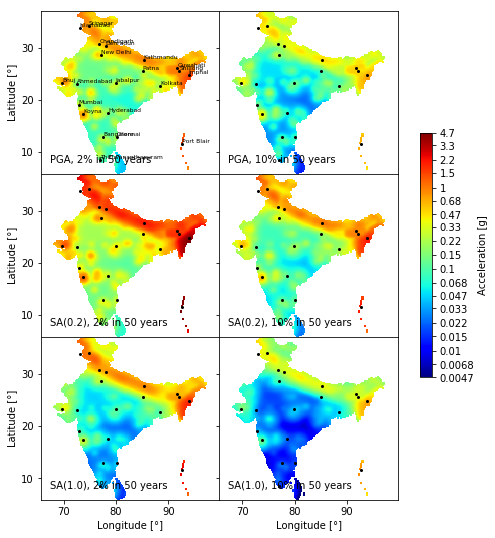

In [10]:
df_calc, config = read_hazard_map_csv(MAP_CSV)
if 'kind' in config:
    print('hazard: ' + config['kind'])
print('investigation_time: %g year' % config['investigation_time'])

imts = df_calc.columns.levels[0].values
poes_inv = df_calc.columns.levels[1].values
print('IMTs:', imts)
print('POEs:', poes_inv)

poes_nom = convert_probability(poes_inv, config['investigation_time'], T_NOM)
print('POEs in %g years: %s' % (T_NOM, ', '.join('%g%%' % (100*poe) for poe in poes_nom)))

fig, axes = plt.subplots(len(imts), len(poes_inv), 
                         figsize=(4*len(poes_inv), 3*len(imts)), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'datalim', 'aspect': 1})
fig.subplots_adjust(hspace=0, wspace=0)
for imt, row_axes in zip(imts, axes):
    for poe_inv, poe_nom, ax in zip(poes_inv, POES_NOM, row_axes):
        
        imt_poe_label = ('%s, %.3g%% in %g years' % 
                         (str(imt), 100*poe_nom, T_NOM))
        annotate(imt_poe_label, 'lower left', ax)
        
        df = df_calc[(imt, poe_inv)].unstack()
        x = np.hstack((df.index - grid_step/2, df.index.max() + grid_step/2))
        y = np.hstack((df.columns - grid_step/2, df.columns.max() + grid_step/2))
        im = ax.pcolormesh(x, y, df.values.T, cmap='jet', norm=LogNorm(iml_limits[0], iml_limits[1]))

        ax.plot(df_cities['Longitude (°E)'], 
                df_cities['Latitude (°N)'], 
                'ko', markersize=2)
        
for city, info in df_cities.iterrows():
    axes[0, 0].annotate(city, (info['Longitude (°E)'], info['Latitude (°N)']), 
                        va='bottom', fontsize=6)

axes[0, 0].set_aspect('equal')
axes[0, 0].autoscale(enable=True, axis=u'both', tight=True)
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5, label='Acceleration [g]')
cbar.set_ticks(iml_boundaries)
cbar.ax.set_yticklabels(iml_labels)
        
[ax.set_xlabel(u'Longitude [°]') for ax in axes[-1, :]]
[ax.xaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[-1, :]]
[ax.set_ylabel(u'Latitude [°]') for ax in axes[:, 0]]
[ax.yaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[:, 0]]
map_pdf = os.path.splitext(os.path.basename(MAP_CSV))[0] + '.png'
print('Saving: ' + map_pdf)
fig.savefig(map_pdf, dpi=300, bbox_inches='tight')

## Comparison

In [11]:
df_ratio = df_calc/df_pub

ratio_csv = os.path.splitext(os.path.basename(MAP_CSV))[0] + '_ratio.csv'
print('Saving: ' + ratio_csv)
df_ratio_temp = df_ratio.copy()
df_ratio_temp.columns = ['-'.join(str(item) for item in items) for items in df_ratio.columns.tolist()]
df_ratio_temp.columns.name = None
df_ratio_temp.reset_index(inplace=True)
df_ratio_temp.to_csv(ratio_csv, index=False)

Saving: hazard_map-mean_24323_ratio.csv


Saving: hazard_map-mean_24323_ratio.png


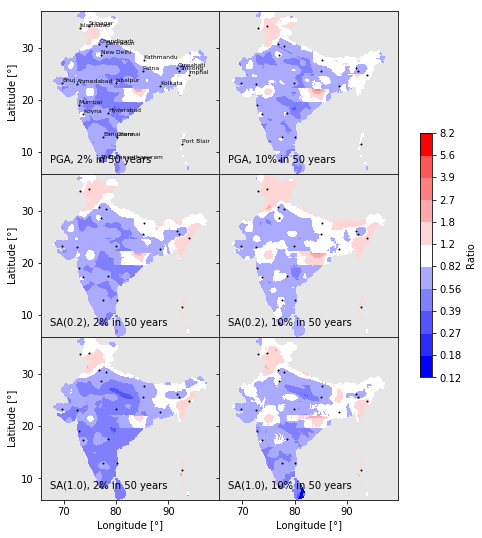

In [12]:
ratio_limits = (0.1, 10)
ratio_boundaries = logspace(ratio_limits[0], ratio_limits[1], 12)[1::2]
ratio_cmap = plt.cm.get_cmap('bwr', len(ratio_boundaries) + 1)
ratio_norm = BoundaryNorm(ratio_boundaries, ncolors=ratio_cmap.N, clip=True)
ratio_labels = ['%g' % item for item in ratio_boundaries]

fig, axes = plt.subplots(len(imts), len(poes_inv), 
                         figsize=(4*len(poes_inv),3*len(imts)), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'datalim', 'aspect': 1})
fig.subplots_adjust(hspace=0, wspace=0)
for imt, row_axes in zip(imts, axes):
    for poe_inv, poe_nom, ax in zip(poes_inv, POES_NOM, row_axes):
        ax.set_facecolor('0.9')
        imt_poe_label = ('%s, %.3g%% in %g years' % 
                         (str(imt), 100*poe_nom, T_NOM))
        annotate(imt_poe_label, 'lower left', ax)
        df = df_ratio[(imt, poe_inv)].unstack()
        x = np.hstack((df.index - grid_step/2, df.index.max() + grid_step/2))
        y = np.hstack((df.columns - grid_step/2, df.columns.max() + grid_step/2))
        im = ax.pcolormesh(x, y, df.values.T, cmap=ratio_cmap, norm=ratio_norm, 
                           vmin=ratio_limits[0], vmax=ratio_limits[1])
        
        ax.plot(df_cities['Longitude (°E)'], 
                df_cities['Latitude (°N)'], 
                'ko', markersize=1)
        
for city, info in df_cities.iterrows():
    axes[0, 0].annotate(city, (info['Longitude (°E)'], info['Latitude (°N)']), 
                        va='bottom', fontsize=6)

plt.gca().set_aspect('equal')
plt.autoscale(enable=True, axis=u'both', tight=True)
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.5, label='Ratio')
cbar.set_ticks(ratio_boundaries)
cbar.ax.set_yticklabels(ratio_labels)
    
[ax.set_xlabel(u'Longitude [°]') for ax in axes[-1, :]]
[ax.xaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[-1, :]]
[ax.set_ylabel(u'Latitude [°]') for ax in axes[:, 0]]
[ax.yaxis.set_major_locator(MultipleLocator(base=10.)) for ax in axes[:, 0]]

ratio_pdf = os.path.splitext(os.path.basename(MAP_CSV))[0] + '_ratio.png'
print('Saving: ' + ratio_pdf)
fig.savefig(ratio_pdf, dpi=300, bbox_inches='tight')

In [13]:
city = df_cities.loc['Srinagar']
city

Latitude (°N)     34.08
Longitude (°E)     74.8
BIS                0.18
zone                  V
GSHAP              0.25
Present            0.33
Other               NaN
Reference           NaN
Name: Srinagar, dtype: object

In [14]:
def get_near(df, city):
    delta_x = np.abs(df.index.get_level_values('lon') - city['Longitude (°E)'])
    delta_y = np.abs(df.index.get_level_values('lat') - city['Latitude (°N)'])
    index = np.where((delta_x == delta_x.min()) & (delta_y == delta_y.min()))[0][0]
    return df.iloc[index]

In [15]:
df_comparison = pd.concat((get_near(df_calc, city).round(3), 
                           get_near(df_pub, city).round(3), 
                           (100*(get_near(df_ratio, city) - 1)).round(1)), axis=1).T
df_comparison.index = ['current', 'published', 'change [%]']
df_comparison.reindex(sorted(df_comparison.columns), axis=1)
df_comparison.T

current  published  change [%]
imt     poe                                     
PGA     0.000404    0.783      0.650        20.4
        0.002105    0.424      0.329        28.7
SA(0.2) 0.000404    1.659      1.173        41.4
        0.002105    0.854      0.539        58.6
SA(1.0) 0.000404    0.982      0.814        20.7
        0.002105    0.350      0.288        21.5